In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
abNormalhHeartData = pd.read_csv('ptbdb_abnormal.csv', header=None)
normalhHeartData = pd.read_csv('ptbdb_normal.csv', header=None)

print('Abnormal heart data information')
abNormalhHeartData.info()

print('Normal heart data information')
normalhHeartData.info()

Abnormal heart data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 15.1 MB
Normal heart data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4046 entries, 0 to 4045
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 5.8 MB


In [3]:
abNormalhHeartData.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
abNormalhHeartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 15.1 MB


In [5]:
abNormalhHeartData.shape

(10506, 188)

In [6]:
normalhHeartData.shape

(4046, 188)

In [7]:
normalhHeartData.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'STD for heart data')

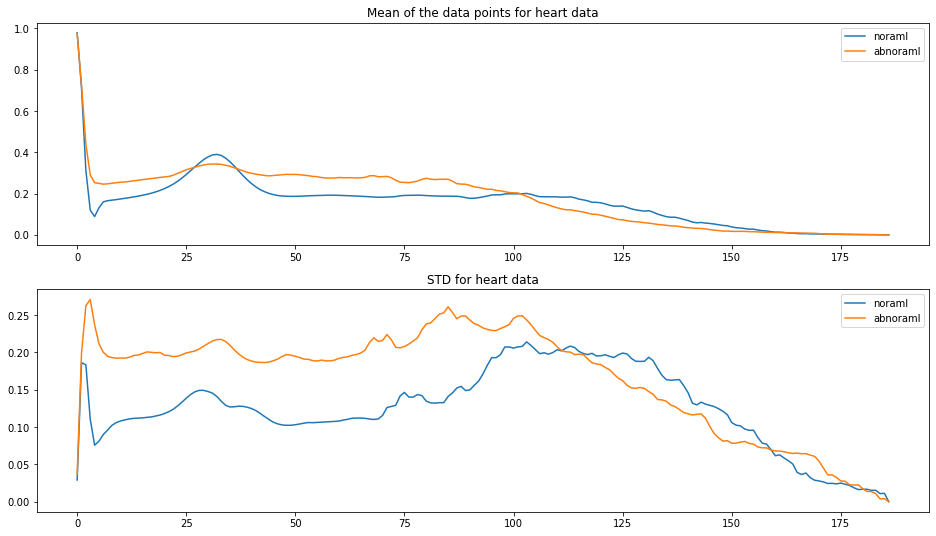

In [8]:
_, (ax1,ax2) = plt.subplots(2,1, figsize=(16,9))

ax1.plot(normalhHeartData.loc[:,:186].mean(), label='noraml')
ax1.plot(abNormalhHeartData.loc[:,:186].mean(), label='abnoraml')
ax1.set_title("Mean of the data points for heart data")
ax1.legend()


ax2.plot(normalhHeartData.loc[:,:186].std(), label='noraml')
ax2.plot(abNormalhHeartData.loc[:,:186].std(), label='abnoraml')
ax2.legend()
ax2.set_title("STD for heart data")

In [9]:
all_heart_data = pd.concat([abNormalhHeartData, normalhHeartData], axis=0, ignore_index=True)
# all_heart_data = all_heart_data.sample(frac=1, random_state=0) # shuffle the data 
print(all_heart_data.info())
all_heart_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14552 entries, 0 to 14551
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 20.9 MB
None


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
all_heart_data.loc[:,187].value_counts()

1.0    10506
0.0     4046
Name: 187, dtype: int64

In [11]:
X = all_heart_data.loc[:,:186]
y = all_heart_data.loc[:,187]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [13]:
log_model = LogisticRegression(random_state=0)
log_model.fit(X_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [14]:
predicted_point = log_model.predict([X_test.iloc[0,:]])
print('Predict value using the LogisticRegression model: ', end='')
print(predicted_point)
print('The true value: ',end='')
print(y_test.iloc[0])

Predict value using the LogisticRegression model: [1.]
The true value: 0.0


In [15]:
print(f'The accuracy of the LogisticRegression model on train data = {log_model.score(X_train, y_train)*100:.3}%')

The accuracy of the LogisticRegression model on train data = 83.3%


In [16]:
print(f'The accuracy of the LogisticRegression model on test data = {log_model.score(X_test, y_test)*100:.3}%')

The accuracy of the LogisticRegression model on test data = 82.2%


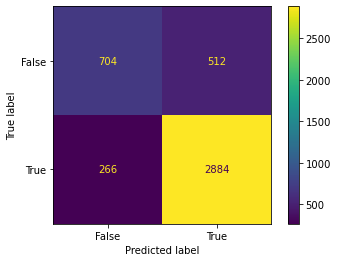

In [17]:
predicted = log_model.predict(X_test)
actual =  y_test
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [18]:
dec_tree_model = DecisionTreeClassifier(random_state=0)
dec_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [19]:
predicted = dec_tree_model.predict([X_test.iloc[0,:]])
print('predict value using the DecisionTreeClassifier model: ', end='')
print(predicted)
print('The true value: ',end='')
print(y_test.iloc[0])

predict value using the DecisionTreeClassifier model: [0.]
The true value: 0.0


In [20]:
print(f'The accuracy of the DecisionTreeClassifier model on train data = {dec_tree_model.score(X_train,y_train)*100:.5}%')

The accuracy of the DecisionTreeClassifier model on train data = 100.0%


In [21]:
print(f'The accuracy of the DecisionTreeClassifier model on train data = {dec_tree_model.score(X_test,y_test)*100:.3}%')

The accuracy of the DecisionTreeClassifier model on train data = 92.1%


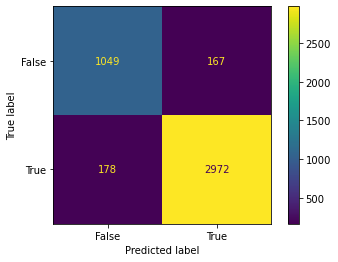

In [22]:
predicted = dec_tree_model.predict(X_test)
actual =  y_test
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [23]:
#knn_model = KNeighborsClassifier(n_neighbors=5)
#knn_model.fit(X_train, y_train)

In [24]:
##predicted = knn_model.predict([X_test.iloc[0,:]])
##print('predict value using the knn model: ', end='')
##print(predicted)
#print('The true value: ',end='')
#print(y_test.iloc[0])

In [25]:
rand_model = RandomForestClassifier()
rand_model.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
predicted = rand_model.predict([X_test.iloc[0,:]])
print('predict value using the knn model: ', end='')
print(predicted)
print('The true value: ',end='')
print(y_test.iloc[0])

predict value using the knn model: [0.]
The true value: 0.0


In [27]:
print(f'The accuracy of the knn model on train data = {rand_model.score(X_train,y_train)*100:.5}%')

The accuracy of the knn model on train data = 100.0%


In [33]:
print(f'The accuracy of the knn model on test data = {rand_model.score(X_test,y_test)*100:.3}%')

The accuracy of the knn model on test data = 96.9%


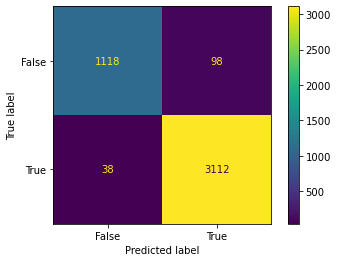

In [29]:
predicted = rand_model.predict(X_test)
actual =  y_test
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()